Here, we have to predict the sales of product on the basis of properties of products and stores.
So, our target variable here is Item_Outlet_Sales.
Steps we are going to follow -
     1. Define research Goal
     2. Retrieving Data
     3. Data Preprocessing
     4. EDA
     5. Data Modeling
     6. Model Testing
  

In [1]:
# Importing requiered Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

In [2]:
bigdatamart_train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")

In [3]:
bigdatamart_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


From above table we can seperate categorical Features of the data and Numerical features of the data set:
 - Categorical Variable:
    
    .Item_Identifier
    .Item_Fat_Content
    .Item_Type
    .Outlet_Identifier
    .Outlet_Size
    .Outlet_Location_Type
    .Outlet_Type
    -> 7 categorical features
    
 - Numerical Variables
    .Item_Weight
    .Item_Visibility
    .Item_MRP
    .Outlet_Establishment_Year
    .Item_Outlet_Sales
    -> 6 features are numerical

In [4]:
bigdatamart_test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")

In [5]:
bigdatamart_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In above table we can see that Item_Outlet_Sales column is missing, 
it is beacuse Item_Outlet_Sales is our target variable and via test data set we have to predict the same.

=> Combining both train and test data sets into one and then performing EDA would save the time of performing the same steps      again on the test dataset. And we can later divide them again.
   Lets combine them into a dataframe ‘BigMartSales’.

In [6]:
bigdatamart_train['source']='train'
bigdatamart_test['source']='test'
BigMartSales=pd.concat([bigdatamart_train, bigdatamart_test],ignore_index=True)
print (bigdatamart_train.shape, bigdatamart_test.shape, BigMartSales.shape)

(8523, 13) (5681, 12) (14204, 13)


We can see that total number of records in BigMartSales and sum of records of training and testing data are same.
Only one column is missing in our testing data and that is our Target Variable.

In [7]:
# Checking for the missing values
BigMartSales.isnull().sum()


Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

We have missing values in Item_Weight, Outlet_Size and Item_Outlet_Sales columns out of which maximum missing values are in 
Item_Outlet_Sales which is our target variable and missing values belongs to test dataset so that is not a problem.
We will only have to impute the values in Item_Weight (Numeric) and Outlet_Size(categorical) columns.

In [8]:
# Statistical Information of dataset
BigMartSales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


=> Handling missing values Item_Weight is numeric and Outlet_Size is categorical variable
Missing values of Item_Weight would be filled by the mean value
MIssing values of Outlet_Size would be filled by its mode

In [10]:
# Imputing the Item_Weight column
BigMartSales['Item_Weight'].fillna(BigMartSales['Item_Weight'].mean(), inplace = True)
BigMartSales.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Now, we can see that there is no NULL values in Item_Weight column.

In [11]:
# Imputing the Outlet_Size column, we have to find the mode of different categories in that column:

mode_of_outletsize = BigMartSales.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_outletsize)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [12]:
missing_values=BigMartSales['Outlet_Size'].isnull()
print(missing_values)

0        False
1        False
2        False
3         True
4        False
         ...  
14199    False
14200    False
14201     True
14202     True
14203     True
Name: Outlet_Size, Length: 14204, dtype: bool


Here, True represents the missing value and False means the value is present, so we have to fill all the Trues.

In [18]:
BigMartSales.loc[missing_values,'Outlet_Size']=BigMartSales.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outletsize)

In [19]:
# Now, to check for the missing values in 'Outlet_Size'
BigMartSales.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [ ]:
We have successfully removed the missing values of 'Item_Weight' and 'Outlet_Size'.

UNIVARIATE ANALYSIS OF THE DATASET
    - Here, we will explore each variable (column) in our dataset.

We have already seen that out of 12 predictor variables 7 are Categorical(nominal) and 5 are Numerical.

In [20]:
# First, Checking for Numerical Predictors
    
BigMartSales.describe()   

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.234226,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400
50%,12.792854,0.054021,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [21]:
sns.set()

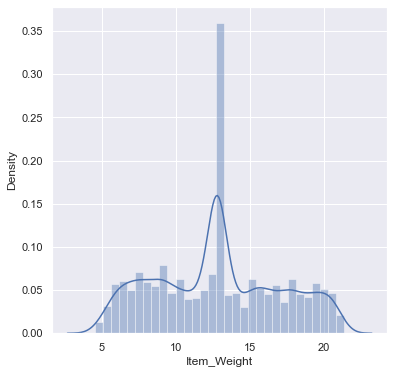

In [22]:
# Item_weight distribution
plt.figure(figsize=(6,6))
sns.distplot(BigMartSales['Item_Weight'])
plt.show()

Above graph shows that most of the values lying between the range of 10-15. The mean of the 'Item_Weight' also verify the same.

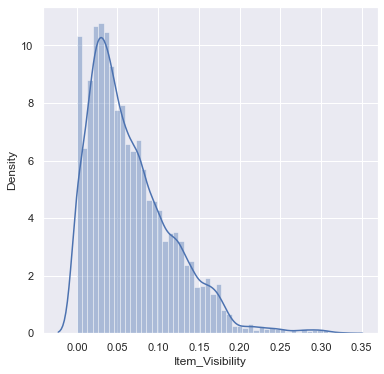

In [23]:
# Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(BigMartSales['Item_Visibility'])
plt.show()

In above graph of 'Item_Visibility' we found that its distribution is right skewed which means more values are near zero.
We will deal with it later.

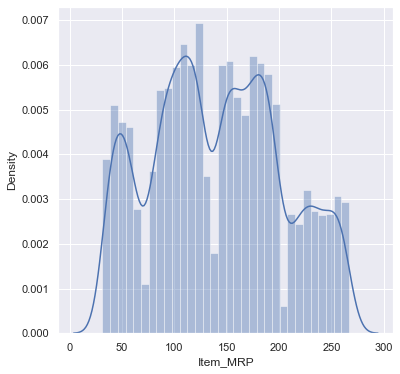

In [24]:
# Item_MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(BigMartSales['Item_MRP'])
plt.show()

It shows that distribution of 'Item_MRP' is not Normal. More items are having the price range between 100-200.

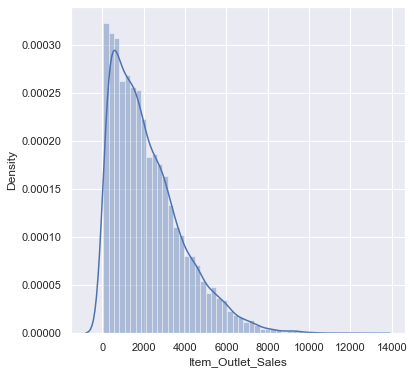

In [25]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(BigMartSales['Item_Outlet_Sales'])
plt.show()

We can see in above plot that our target variable is skewed towards the right. Therefore, we have to normalize it.

Now, we study the distribution of 'Outlet_Establishment_Year' :
     To proceed here we will convert Outlet_Establishment_Year to a new feature calculating the age of outlets, because through      Etablishment_Year actually we are interested in the operating years of the Outlets.

In [27]:
#As the dataset is from 2013

BigMartSales['Outlet_Years'] = 2013 - BigMartSales['Outlet_Establishment_Year']
BigMartSales['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

This shows stores are 4-28 years old.

Handling Type of Item

In [68]:
#Get the first two characters of ID:

BigMartSales['Item_Type_Combined'] = BigMartSales['Item_Identifier'].apply(lambda x: x[0:2])

#Rename them :

BigMartSales['Item_Type_Combined'] = BigMartSales['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

In [69]:
BigMartSales['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

 Modify categories of Item_Fat_Content

In [74]:
#We found typos and difference in representation in categories of Item_Fat_Content variable. This can be corrected as:
#Change categories of low fat:

print ('Original Categories:')
print (BigMartSales['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
BigMartSales['Item_Fat_Content'] = BigMartSales['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                                             'reg':'Regular',
                                                                             'low fat':'Low Fat'})
print (BigMartSales['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


Label Encoding

In [76]:
encoder= LabelEncoder()

In [83]:
BigMartSales['Item_Identifier']=encoder.fit_transform(BigMartSales['Item_Identifier'])

In [84]:
BigMartSales['Item_Fat_Content']=encoder.fit_transform(BigMartSales['Item_Fat_Content'])

In [85]:
BigMartSales['Item_Type']=encoder.fit_transform(BigMartSales['Item_Type'])

In [86]:
BigMartSales['Outlet_Identifier']=encoder.fit_transform(BigMartSales['Outlet_Identifier'])

In [88]:
BigMartSales['Outlet_Location_Type']=encoder.fit_transform(BigMartSales['Outlet_Location_Type'])

In [89]:
BigMartSales['Outlet_Type']=encoder.fit_transform(BigMartSales['Outlet_Type'])

In [94]:
BigMartSales['Outlet_Size']=encoder.fit_transform(BigMartSales['Outlet_Size'])

In [95]:
print(BigMartSales['Outlet_Size'])

0                                                   Medium
1                                                   Medium
2                                                   Medium
3        Outlet_Type Grocery Store Supermarket Type1 Su...
4                                                     High
                               ...                        
14199                                                Small
14200                                               Medium
14201    Outlet_Type Grocery Store Supermarket Type1 Su...
14202    Outlet_Type Grocery Store Supermarket Type1 Su...
14203    Outlet_Type Grocery Store Supermarket Type1 Su...
Name: Outlet_Size, Length: 14204, dtype: object


In [99]:
convert_dict = {'Outlet_Size': object}

In [100]:
df1 = BigMartSales.astype(convert_dict)
print(df1.dtypes)

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility               object
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type           int64
Outlet_Type                    int32
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Type_Combined            object
Outlet                         int32
dtype: object


In [101]:
df1['Outlet_Size']=encoder.fit_transform(df1['Outlet_Size'])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['DataFrame', 'str']